# McKinney Chapter 5 - Practice for Section 02

## Announcements

1. No DataCamp this week, but I suggest you keep working on it
2. Keep forming groups, and I will post our first project early next week

## 10-Minute Recap

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
%precision 4
pd.options.display.float_format = '{:.4f}'.format
%config InlineBackend.figure_format = 'retina'

There are two pandas data structures:

1. Data frames are like worksheets in an Excel workbook (2-D, mixed data type)
2. Series are like a column in a worksheet (1-D, only one data type)

In [3]:
np.random.seed(42)
df = pd.DataFrame(
    data=np.random.randn(3, 5),
    index=list('ABC'),
    columns=list('abcde')
)

df

,a,b,c,d,e
A,0.4967,-0.1383,0.6477,1.5230,-0.2342
B,-0.2341,1.5792,0.7674,-0.4695,0.5426
C,-0.4634,-0.4657,0.2420,-1.9133,-1.7249


We can slice data frames two ways!

1. By integer locations with the `.iloc[]` method
2. By row and column names with the `.loc[]` method

How can we grab the first 2 rows and 3 columns?

In [4]:
df.iloc[:2, :3] # pandas .iloc[] uses j,k notation, like NumPy

,a,b,c
A,0.4967,-0.1383,0.6477
B,-0.2341,1.5792,0.7674


***When we slice by names or string, pandas includes both left and right edges!***

In [5]:
df.loc['A':'B', 'a':'c']

,a,b,c
A,0.4967,-0.1383,0.6477
B,-0.2341,1.5792,0.7674


How can we add a column?

In [6]:
df['f'] = 2_001

df

,a,b,c,d,e,f
A,0.4967,-0.1383,0.6477,1.5230,-0.2342,2001
B,-0.2341,1.5792,0.7674,-0.4695,0.5426,2001
C,-0.4634,-0.4657,0.2420,-1.9133,-1.7249,2001


What if we want to insert a column between "b" and "c"?
We can use the `.insert()` method!
Note. I was surprised the `.insert()` operates "in place" without an option to override!

In [7]:
df.insert(
    loc=2,
    column='C',
    value=5
)

In [8]:
df.loc[:, 'a':'c']

,a,b,C,c
A,0.4967,-0.1383,5,0.6477
B,-0.2341,1.5792,5,0.7674
C,-0.4634,-0.4657,5,0.2420


In [9]:
df[['a', 'b', 'C', 'c']]

,a,b,C,c
A,0.4967,-0.1383,5,0.6477
B,-0.2341,1.5792,5,0.7674
C,-0.4634,-0.4657,5,0.2420


A series is the other data structure in pandas!

In [10]:
ser = pd.Series(data=np.arange(2.), index=['B', 'C'])

ser

B   0.0000
C   1.0000
dtype: float64

In [11]:
df['g'] = ser

df

,a,b,C,c,d,e,f,g
A,0.4967,-0.1383,5,0.6477,1.5230,-0.2342,2001,NaN
B,-0.2341,1.5792,5,0.7674,-0.4695,0.5426,2001,0.0000
C,-0.4634,-0.4657,5,0.2420,-1.9133,-1.7249,2001,1.0000


## Practice

In [12]:
tickers = 'AAPL IBM MSFT GOOG'
prices = yf.download(tickers=tickers)

[*********************100%%**********************]  4 of 4 completed


In [13]:
returns = (
    prices['Adj Close'] # slice adj close column
    .iloc[:-1] # drop last row with intra day prices, which are sometimes missing
    .pct_change() # calculate returns
    .dropna() # drop leading rows with at least one missing value
)

returns

,AAPL,GOOG,IBM,MSFT
Date,,,,
2004-08-20,0.0029,0.0794,0.0042,0.0029
2004-08-23,0.0091,0.0101,-0.0070,0.0044
2004-08-24,0.0280,-0.0414,0.0007,0.0000
2004-08-25,0.0344,0.0108,0.0042,0.0114
2004-08-26,0.0487,0.0180,-0.0045,-0.0040
...,...,...,...,...
2024-01-23,0.0067,0.0066,0.0064,0.0060
2024-01-24,-0.0035,0.0112,-0.0001,0.0092
2024-01-25,-0.0017,0.0219,0.0949,0.0057


In [14]:
returns = prices['Adj Close'].pct_change().dropna()
returns

,AAPL,GOOG,IBM,MSFT
Date,,,,
2004-08-20,0.0029,0.0794,0.0042,0.0029
2004-08-23,0.0091,0.0101,-0.0070,0.0044
2004-08-24,0.0280,-0.0414,0.0007,0.0000
2004-08-25,0.0344,0.0108,0.0042,0.0114
2004-08-26,0.0487,0.0180,-0.0045,-0.0040
...,...,...,...,...
2024-01-24,-0.0035,0.0112,-0.0001,0.0092
2024-01-25,-0.0017,0.0219,0.0949,0.0057
2024-01-26,-0.0090,0.0010,-0.0158,-0.0023


### What are the mean daily returns for these four stocks?

In [15]:
returns.mean()

AAPL   0.0014
GOOG   0.0010
IBM    0.0004
MSFT   0.0008
dtype: float64

We if want an equally-weighted portfolio return?
We could take the mean of each *row* with `.mean(axis=1)`.
The mean is the same as the sum of 0.25 times each of the 4 columns.

In [16]:
returns.mean(axis=1)

Date
2004-08-20    0.0224
2004-08-23    0.0041
2004-08-24   -0.0032
2004-08-25    0.0152
2004-08-26    0.0146
               ...  
2024-01-24    0.0042
2024-01-25    0.0302
2024-01-26   -0.0065
2024-01-29    0.0040
2024-01-30   -0.0074
Length: 4894, dtype: float64

### What are the standard deviations of daily returns for these four stocks?

In [17]:
returns.std()

AAPL   0.0206
GOOG   0.0193
IBM    0.0143
MSFT   0.0171
dtype: float64

### What are the *annualized* means and standard deviations of daily returns for these four stocks?

We multiply by $T$ to annualize means, where $T$ is the number of observations per year.

In [18]:
returns.mean().mul(252)

AAPL   0.3629
GOOG   0.2588
IBM    0.0983
MSFT   0.2008
dtype: float64

We multiply by $\sqrt{T}$ to annualize volatilities, where $T$ is the number of observations per year.

In [19]:
returns.std().mul(np.sqrt(252))

AAPL   0.3276
GOOG   0.3070
IBM    0.2271
MSFT   0.2721
dtype: float64

### Plot *annualized* means versus standard deviations of daily returns for these four stocks

Use `plt.scatter()`, which expects arguments as `x` (standard deviations) then `y` (means).

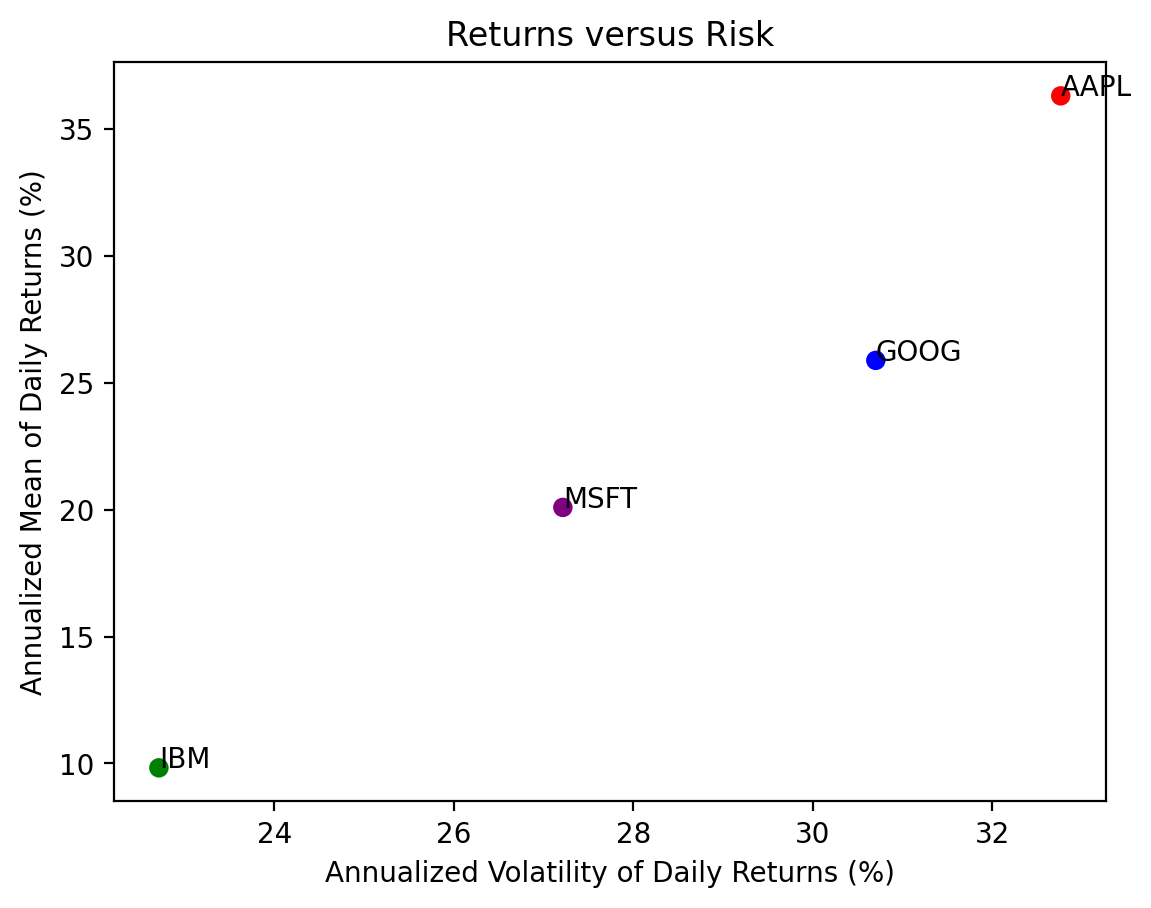

In [20]:
vols = returns.std().mul(np.sqrt(252) * 100)
means = returns.mean().mul(252 * 100)

plt.scatter(
    x=vols,
    y=means,
    c=['red', 'blue', 'green', 'purple']
)

plt.xlabel('Annualized Volatility of Daily Returns (%)')
plt.ylabel('Annualized Mean of Daily Returns (%)')

# plt.xlim((0, vols.max() + 5))
# plt.ylim((0, means.max() + 5))

# add tickers to each point
for i in means.index: # loop over ticker index
    plt.text( # plots string s at coordinates x and y
        x=vols[i], # indexes volatility
        y=means[i], # indexes mean return
        s=i # ticker index
    )

plt.title('Returns versus Risk')
plt.show() # suppresses output of last function call

### Repeat the previous calculations and plot for the stocks in the Dow-Jones Industrial Index (DJIA)

We can find the current DJIA stocks on [Wikipedia](https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average).
We will need to download new data, into `tickers2`, `prices2`, and `returns2`.

### Calculate total returns for the stocks in the DJIA

We can use the `.prod()` method to compound returns as $1 + R_T = \prod_{t=1}^T (1 + R_t)$.
Technically, we should write $R_T$ as $R_{0,T}$, but we typically omit the subscript $0$.

### Plot the distribution of total returns for the stocks in the DJIA

We can plot a histogram, using either the `plt.hist()` function or the `.plot(kind='hist')` method.

### Which stocks have the minimum and maximum total returns?

### Plot the cumulative returns for the stocks in the DJIA

We can use the cumulative product method `.cumprod()` to calculate the right hand side of the formula above.

### Repeat the plot above with only the minimum and maximum total returns